## ANN Sales prediction

Data sample - monthly data (from Jan 2007 to Jun 2013) on Norway sales of Ford Focus (for the whole country). 

Goal - construct a prediction model based on an ANN.

*Data source: Kaggle*

In [2]:
# load traditional libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

matplotlib.style.use('ggplot')

In [3]:
# load KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


## 1. Data import and preliminary analysis

In [4]:
sales = pd.read_csv('fordsales.csv',sep=';', header=0)
print(sales.shape)
sales.head()

(78, 2)


,date,fordsales
0,01.01.07,400
1,01.02.07,296
2,01.03.07,311
3,01.04.07,147
4,01.05.07,274


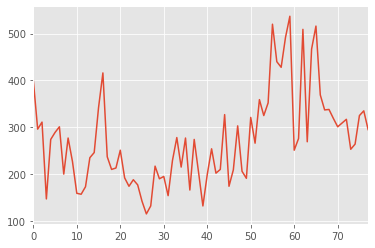

In [5]:
# to look at the data, construct a time-series plot
sales['fordsales'].plot()

C:\Users\danil\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


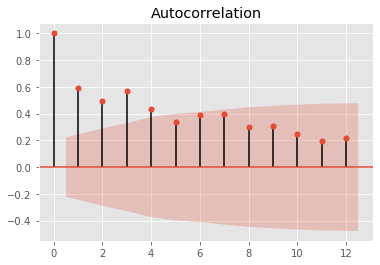

In [6]:
# autocorrelation of the time-series. 
acf = smt.graphics.plot_acf(sales['fordsales'], lags=12 , alpha=0.05)
acf.show()

# If the spikes go inside the box before 10-12 leg, there is stationarity 

## 2. Preparing the dataset

In [7]:
# generate the necessary features
sales_2 = pd.DataFrame()

for i in range (12,0,-1):
    sales_2['t-'+str(i)] = sales['fordsales'].shift(i)

sales_2['t'] = sales['fordsales'].values

print(sales_2.head(13))

     t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
0     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  400.0   
4     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  400.0  296.0   
5     NaN    NaN    NaN    NaN    NaN    NaN    NaN  400.0  296.0  311.0   
6     NaN    NaN    NaN    NaN    NaN    NaN  400.0  296.0  311.0  147.0   
7     NaN    NaN    NaN    NaN    NaN  400.0  296.0  311.0  147.0  274.0   
8     NaN    NaN    NaN    NaN  400.0  296.0  311.0  147.0  274.0  289.0   
9     NaN    NaN    NaN  400.0  296.0  311.0  147.0  274.0  289.0  301.0   
10    NaN    NaN  400.0  296.0  311.0  147.0  274.0  289.0  301.0  200.0   
11    NaN  400.0  296.0  311.0  147.0  274.0  289.0  301.0  200.0  277.0   
12  400.0  2

In [8]:
# adjust the sample - omit rows with NaNs
sales_3 = sales_2[12:]
print(sales_3.shape)
sales_3.head()


(66, 13)


,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,400.0,296.0,311.0,147.0,274.0,289.0,301.0,200.0,277.0,227.0,159.0,157.0,173
13,296.0,311.0,147.0,274.0,289.0,301.0,200.0,277.0,227.0,159.0,157.0,173.0,235
14,311.0,147.0,274.0,289.0,301.0,200.0,277.0,227.0,159.0,157.0,173.0,235.0,246
15,147.0,274.0,289.0,301.0,200.0,277.0,227.0,159.0,157.0,173.0,235.0,246.0,342
16,274.0,289.0,301.0,200.0,277.0,227.0,159.0,157.0,173.0,235.0,246.0,342.0,416


In [9]:
# make the train and test samples
y = sales_3['t']
X = sales_3.drop('t',axis=1)

X_train_df = X[:63]
y_train_df = y[:63]
X_test_df = X[63:]
y_test_df = y[63:]

print(X_test_df)

     t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
75  269.0  467.0  516.0  369.0  337.0  338.0  319.0  301.0  309.0  317.0   
76  467.0  516.0  369.0  337.0  338.0  319.0  301.0  309.0  317.0  253.0   
77  516.0  369.0  337.0  338.0  319.0  301.0  309.0  317.0  253.0  264.0   

      t-2    t-1  
75  253.0  264.0  
76  264.0  325.0  
77  325.0  335.0  


In [10]:
# transform the samples
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

print(X_test)

[[269. 467. 516. 369. 337. 338. 319. 301. 309. 317. 253. 264.]
 [467. 516. 369. 337. 338. 319. 301. 309. 317. 253. 264. 325.]
 [516. 369. 337. 338. 319. 301. 309. 317. 253. 264. 325. 335.]]


## 3. Constructing and using a simple ANN

### 3.1. Construct an ANN

In [11]:
# construct a model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
#model.add(Dense(24, activation='relu'))
model.add(Dense(1,activation='linear'))

In [12]:
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [13]:
# fit (train) the model
model.fit(X_train, y_train, epochs=100, batch_size=None)

Epoch 1/100
63/63 [==============================] - 0s 5ms/step - loss: 71115.4484 - mean_absolute_percentage_error: 90.5081
Epoch 100/100
63/63 [==============================] - 0s 48us/step - loss: 6858.4911 - mean_absolute_percentage_error: 24.5959


### 3.2. Evaluate performance of the ANN

In [14]:
# look at the names of available metrics
model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [15]:
# use the "evaluate" function
scores = model.evaluate(X_test, y_test)
print('MAPE: %.2f%%' %(scores[1]))

3/3 [==============================] - 0s 18ms/step
MAPE: 12.25%


### 3.3. Forecasting with the ANN

In [16]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

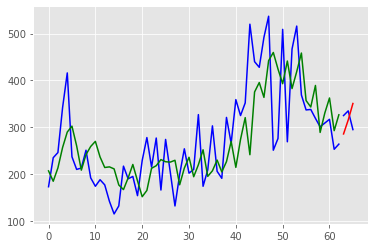

In [17]:
# make x-labels for both samples
x_labels_train = np.arange(0,63,1)
x_labels_test = np.arange(63,66,1)

# make graphs for the training sample
plt.plot(x_labels_train, y_train, color='blue')
plt.plot(x_labels_train, y_pred_train,color='green')

# make graphs for the test sample
plt.plot(x_labels_test, y_test,color='blue')
plt.plot(x_labels_test, y_pred_test,color='red')

In [18]:
# print out the predicted values (for the test sample)
print(y_pred_test)

[[285.73422]
 [315.60165]
 [350.72583]]


### 3.4. One-month-ahead prediction

In [19]:
# prepare the regressors
x_1_pred = sales_3[65:].drop('t-12',axis=1)
print(x_1_pred)

     t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
77  369.0  337.0  338.0  319.0  301.0  309.0  317.0  253.0  264.0  325.0   

      t-1    t  
77  335.0  295  


In [20]:
# make a prediction
y_pred_1_July_2013 = model.predict(x_1_pred)
print(y_pred_1_July_2013)

[[309.6184]]
